# Week 3 Back Propagation
We introduce back propagation in numpy and pytorch respectively. 


If you have some questions or suggestion about **BackPropagation with Numpy**, contact Jiaxin Zhuang or email(zhuangjx5@mail2.sysu.edu.cn) 

## 1. Simple expressions and interpretation of the gradient

### 1.1 Simple expressions
Lets start simple so that we can develop the notation and conventions for more complex expressions. Consider a simple multiplication function of two numbers $f(x,y)=xy$. It is a matter of simple calculus to derive the partial derivative for either input:



$$f(x,y) = x y \hspace{0.5in} \rightarrow \hspace{0.5in} \frac{\partial f}{\partial x} = y \hspace{0.5in} \frac{\partial f}{\partial y} = x$$



In [395]:
# set some inputs
x1 = -2; x2 = 5;

In [396]:
# perform the forward pass
f = x1 * x2 # f becomes -10

In [ ]:
# perform the backward pass (backpropagation) in reverse order:
# backprop through f = x * y
dfdx1 = x2 # df/dx = y, so gradient on x becomes 5
print("gradient on x is {:2}".format(dfdx1))
dfdx2 = x1 # df/dy = x, so gradient on y becomes -2
print('gradient on y is {:2}'.format(dfdx2))

### 1.2 interpretation of the gradient
**Interpretation**:The derivatives indicate the rate of change of a function with respect to that variable surrounding an infinitesimally small region near a particular point:
$$\frac{df(x)}{dx} = \lim_{h\ \to 0} \frac{f(x + h) - f(x)}{h}$$
In other words, the derivative on each variable tells you the sensitivity of the whole expression on its value.As mentioned, the gradient $\nabla f$ is the vector of partial derivatives, so we have that $\nabla f = [\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}] = [y, x]$. 

## 2. Compound expressions with chain rule

### 2.1 Simple examples for chain rule
Lets now start to consider more complicated expressions that involve multiple composed functions, such as $f(x,y,z) = (x + y) z$.

This expression is still simple enough to differentiate directly, but we’ll take a particular approach to it that will be helpful with understanding the intuition behind backpropagation. 

In particular, note that this expression can be broken down into two expressions: $q=x+y$ and $f=qz$. As seen in the previous section,$f$ is just multiplication of $q$ and $z$, so $\frac{\partial f}{\partial q} = z, \frac{\partial f}{\partial z} = q$,and $q$ is addition of $x$ and $y$ so $\frac{\partial q}{\partial x} = 1, \frac{\partial q}{\partial y} = 1$.

However, we don’t necessarily care about the gradient on the intermediate value $q$ - the value of $\frac{\partial f}{\partial q}$ is not useful. Instead, we are ultimately interested in the gradient of $f$ with respect to its inputs $x$,$y$,$z$. 

The chain rule tells us that the correct way to “chain” these gradient expressions together is through multiplication. For example, $\frac{\partial f}{\partial x} = \frac{\partial f}{\partial q} \frac{\partial q}{\partial x}$. In practice this is simply a **multiplication** of the two numbers that hold the two gradients. Lets see this with an example:

In [400]:
# set some inputs
x = -2; y = 5; z = -4  

In [ ]:
# perform the forward pass
q = 2*x + y # q becomes 1
f = q * z # f becomes -4
print(q, f)

In [ ]:
# perform the backward pass (backpropagation) in reverse order:
# first backprop through f = q * z = (2*x+y) * z
dfdz = q # df/dz = q, so gradient on z becomes 3
dfdq = z # df/dq = z, so gradient on q becomes -4
# now backprop through q = x + y
dfdx = 2.0 * dfdq # dq/dx = 1. And the multiplication here is the chain rule!
dfdy = 1.0 * dfdq # dq/dy = 1
print('df/dx is {:2}'.format(dfdx))
print('df/dy is {:2}'.format(dfdy))

### 2.2 Intuitive understanding of backpropagation
Notice that backpropagation is a beautifully local process. 
Every gate in a circuit diagram gets some inputs and can right away compute two things: 
1. its output value and 
2. the local gradient of its inputs with respect to its output value. 

## 3. Practice: Writing a simple Feedforward Neural Network 

### 3.1 Outline
We would implement a simple feedforward neural network by using **numpy**. Thus, we need to define network and implement the forward pass as well as the backword propagation.

1. Define a simpel feedforward neural netork, with 1 hidden layer. Implement **forward** and **backward**
2. Load data from local csv file with **pandas**, which contains some training and testing dots, generated by 3 different gaussian distribution.(different mean and std).
3. Define some functions for visualization and training
4. Training and predicting every epoch
6. plot the distribution of the points' label and the predictions

In [453]:
# Load necessary module for later
import numpy as np
import pandas as pd
np.random.seed(1024)

### 3.2  Define a Feedforward Neural Netowk,  implement forward and backward
A simple Neural Network with 1 hidden layer.

```
                                   Networks Structure
                         
                                    Input        Weights            Output
Hidden Layer                     [batch_size, 2] x [2,5]   ->   [batch_size, 5]
activation function(sigmoid)     [batch_size, 5]           ->   [batch_size, 5]
Classification Layer             [batch_size, 5] x [5,3]   ->   [batch_size, 3]
activation function(sigmoid)     [batch_size, 3]           ->   [batch_size, 3]
```

According to training and testing data. Each points is in two-dimension space, and there is three categories. And predictions would be a one-hot vector, like \[0 0 1\] , \[1 0 0\], \[0 1 0\]

In [454]:
w1_initialization = np.random.randn(2, 5)  
w2_initialization = np.random.randn(5, 3)  

In [ ]:
w2_initialization

In [482]:
class FeedForward_Neural_Network(object):
    def __init__(self, learning_rate):
        self.input_channel = 2  #  number of input neurons
        self.output_channel = 3 #  number of output neurons
        self.hidden_channel = 5 # number of hidden neurons
        self.learning_rate = learning_rate
        
        # weights initialization
        # Usually, we use random or uniform initialzation to initialize weight
        # For simplicity, here we use same array to initialze 
#         np.random.randn(self.input_channel, self.hidden_channel) 
        # (2x5) weight matrix from input to hidden layer
        self.weight1 = np.array([[ 2.12444863,  0.25264613,  1.45417876,  0.56923979,  0.45822365],
                                 [-0.80933344,  0.86407349,  0.20170137, -1.87529904, -0.56850693]])
         
        # (5x3) weight matrix from hidden to output layer
#         np.random.randn(self.hidden_channel, self.output_channel)  
        self.weight2 = np.array([ [-0.06510141,  0.80681666, -0.5778176 ],
                               [ 0.57306064, -0.33667496,  0.29700734],
                               [-0.37480416,  0.15510474,  0.70485719],
                               [ 0.8452178 , -0.65818079,  0.56810558],
                               [ 0.51538125, -0.61564998,  0.92611427]])

    
    def forward(self, X):
        """forward propagation through our network
        """
        # dot product of X (input) and first set of 3x2 weights
        self.h1 = np.dot(X, self.weight1)  
        # activation function
        self.z1 = self.sigmoid(self.h1)  
        # dot product of hidden layer (z2) and second set of 3x1 weights
        self.h2 = np.dot(self.z1, self.weight2) 
        # final activation function
        o = self.sigmoid(self.h2)
        return o
    
    def backward(self, X, y, o):
        """Backward, compute gradient and update parameters
        Inputs:
            X: data, [batch_size, 2]
            y: label, one-hot vector, [batch_size, 3]
            o: predictions, [batch_size, 3]
        """
        # backward propgate through the network
        self.o_error = y - o  # error in output
         # applying derivative of sigmoid to error  delata L
        self.o_delta = self.o_error * self.sigmoid_prime(o) 

        # z1 error: how much our hidden layer weights contributed to output error
        self.z1_error = self.o_delta.dot(self.weight2.T)  
        # applying derivative of sigmoid to z1 error
        self.z1_delta = self.z1_error * self.sigmoid_prime(self.z1)  

        # adjusting first set (input --> hidden) weights
        self.weight1 += X.T.dot(self.z1_delta) * self.learning_rate  
        # adjusting second set (hidden --> output) weights
        self.weight2 += self.z1.T.dot(self.o_delta) * self.learning_rate 
        
    def sigmoid(self, s):
        """activation function
        """
        return 1 / (1 + np.exp(-s))

    def sigmoid_prime(self, s):
        """derivative of sigmoid
        """
        return s * (1 - s)

### 3.3 Loading Data From local csv by using Pandas

In [411]:
# Import Module
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

In [412]:
train_csv_file = './labels/train.csv'
test_csv_file = './labels/test.csv'
# Load data from csv file, without header
train_frame = pd.read_csv(train_csv_file, encoding='utf-8', header=None)
test_frame = pd.read_csv(test_csv_file, encoding='utf-8', header=None)

In [ ]:
# show data in Dataframe format (defined in pandas)
train_frame

In [414]:
# obtain data from specific columns

# obtain data from first and second columns and convert into narray
train_data = train_frame.iloc[:,0:2].values 
# obtain labels from third columns and convert into narray
train_labels = train_frame.iloc[:,2].values 
# obtain data from first and second columns and convert into narray
test_data = test_frame.iloc[:,0:2].values
# obtain labels from third columns and convert into narray
test_labels = test_frame.iloc[:,2].values

In [ ]:
# train & test data shape
print(train_data.shape)
print(test_data.shape)
# train & test labels shape
print(train_labels.shape)
print(test_labels.shape)

### 3.4 Define some function for visualization and training

In [416]:
def plot(data, labels, caption):
    """plot the data distribution, !!YOU CAN READ THIS LATER, if you are interested
    """
    colors = cm.rainbow(np.linspace(0, 1, len(set(labels))))
    for i in set(labels):
        xs = []
        ys = []
        for index, label in enumerate(labels):
            if label == i:
                xs.append(data[index][0])
                ys.append(data[index][1])
        plt.scatter(xs, ys, colors[int(i)])    
    plt.title(caption)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [ ]:
plot(train_data, train_labels, 'train_dataset')

In [ ]:
plot(test_data, test_labels, 'test_dataset')

In [419]:
def int2onehot(label):
    """conver labels into one-hot vector, !!YOU CAN READ THIS LATER, if you are interested
    Args:
        label: [batch_size]
    Returns:
        onehot: [batch_size, categories]
    """
    dims = len(set(label))
    imgs_size = len(label)
    onehot = np.zeros((imgs_size, dims))
    onehot[np.arange(imgs_size), label] = 1
    return onehot

In [ ]:
# convert labels into one hot vector
train_labels_onehot = int2onehot(train_labels)
test_labels_onehot = int2onehot(test_labels)
print(train_labels_onehot.shape)
print(train_labels_onehot.shape)

In [421]:
def get_accuracy(predictions, labels):
    """Compute accuracy, !!YOU CAN READ THIS LATER, if you are interested
    Inputs: 
        predictions:[batch_size, categories] one-hot vector
        labels: [batch_size, categories]
    """
    predictions = np.argmax(predictions, axis=1)
    labels = np.argmax(labels, axis=1)
    all_imgs = len(labels)
    predict_true = np.sum(predictions == labels)
    return predict_true/all_imgs

In [422]:
# Please read this function carefully, related to implementation of GD, SGD, and mini-batch
def generate_batch(train_data, train_labels, batch_size):
    """Generate batch
    when batch_size=len(train_data), it's GD
    when batch_size=1, it's SGD
    when batch_size>1 & batch_size<len(train_data), it's mini-batch, usually, batch_size=2,4,8,16...
    """
    iterations = math.ceil(len(train_data)/batch_size)
    for i in range(iterations):
        index_from = i*batch_size
        index_end = (i+1)*batch_size
        yield (train_data[index_from:index_end], train_labels[index_from:index_end])

In [423]:
def show_curve(ys, title):
    """plot curlve for Loss and Accuacy, !!YOU CAN READ THIS LATER, if you are interested
    Args:
        ys: loss or acc list
        title: Loss or Accuracy
    """
    x = np.array(range(len(ys)))
    y = np.array(ys)
    plt.plot(x, y, c='b')
    plt.axis()
    plt.title('{} Curve:'.format(title))
    plt.xlabel('Epoch')
    plt.ylabel('{} Value'.format(title))
    plt.show()

### 3.5 Training model and make predictions

In [442]:
learning_rate = 0.1

In [443]:
epochs = 400 # training epoch

In [479]:
batch_size = len(train_data) # GD
# batch_size = 1               # SGD
# batch_size = 8               # mini-batch

In [ ]:
model = FeedForward_Neural_Network(learning_rate) # declare a simple feedforward neural model

losses = []
accuracies = []

for i in range(epochs):
    loss = 0
    for index, (xs, ys) in enumerate(generate_batch(train_data, train_labels_onehot, batch_size)):
        predictions = model.forward(xs) # forward phase
        loss += 1/2 * np.mean(np.sum(np.square(ys-predictions), axis=1)) # Mean square error
        model.backward(xs, ys, predictions) # backward phase
        
    losses.append(loss)
    
    # train dataset acc computation
    predictions = model.forward(train_data)
    # compute acc on train dataset
    accuracy = get_accuracy(predictions, train_labels_onehot)
    accuracies.append(accuracy)
    
    if i % 50 == 0:
        print('Epoch: {}, has {} iterations'.format(i, index+1))
        print('\tLoss: {:.4f}, \tAccuracy: {:.4f}'.format(loss, accuracy))
        
test_predictions = model.forward(test_data)
# compute acc on test dataset
test_accuracy = get_accuracy(test_predictions, test_labels_onehot)
print('Test Accuracy: {:.4f}'.format(test_accuracy))

##### !!! Homework 1.   Describe the training procedure, based on codes above. 

Your ans: (write down on this cell)
   1. Feedforward train data and get output
   2. Calculate loss compared to the ground truth
   3. Doing back propagation to adjust weights
   4. Record every epoch's loss and accuracy
   5. Train test data with tuned model.

In [ ]:
# Draw losses curve using losses 
show_curve(losses, 'Loss')

In [ ]:
# Draw Accuracy curve using accuracies
show_curve(accuracies, 'Accuracy')

##### !!! Howework 2 
set learning rate = 0.01 to train the model and show two curve below
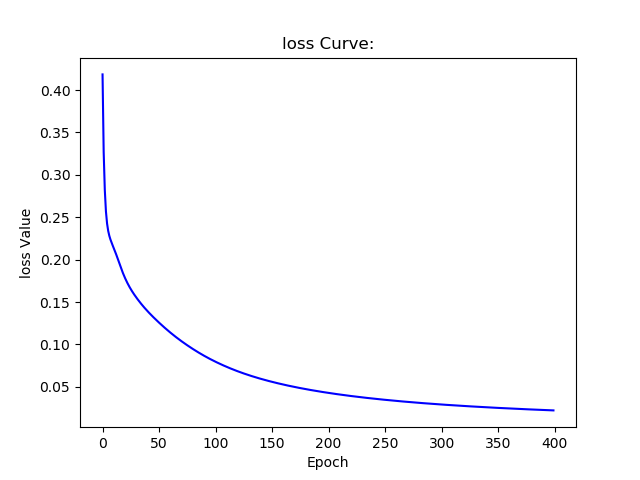
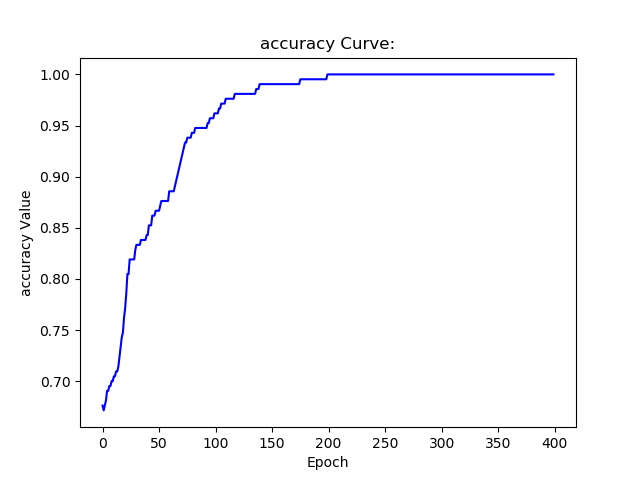

##### !!! Howework 3
Use SGD and mini-batch to train model and show four curve below

                                                          SGD

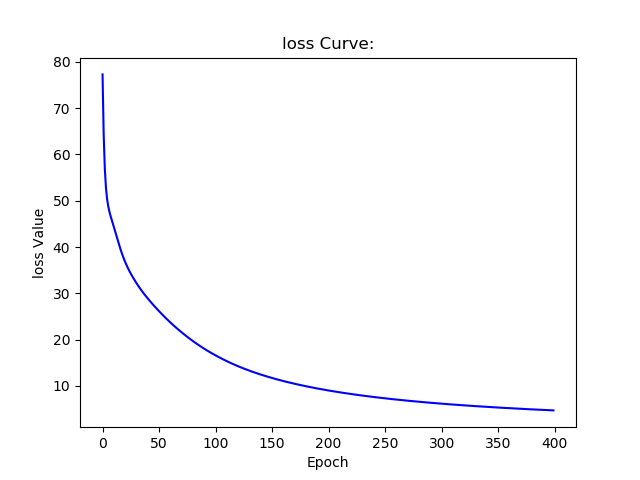
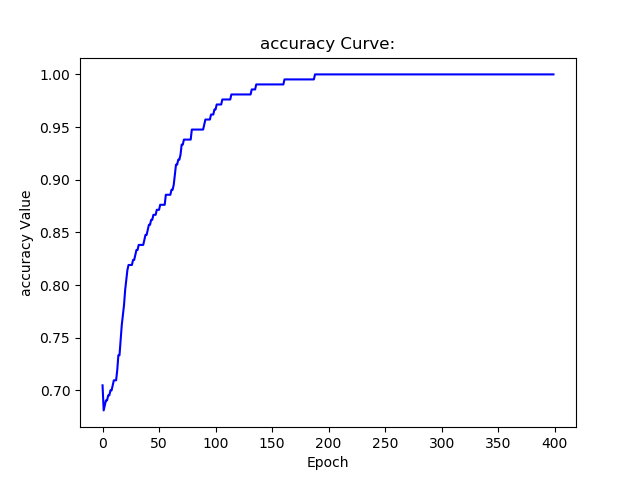
 
                                                       mini-batch

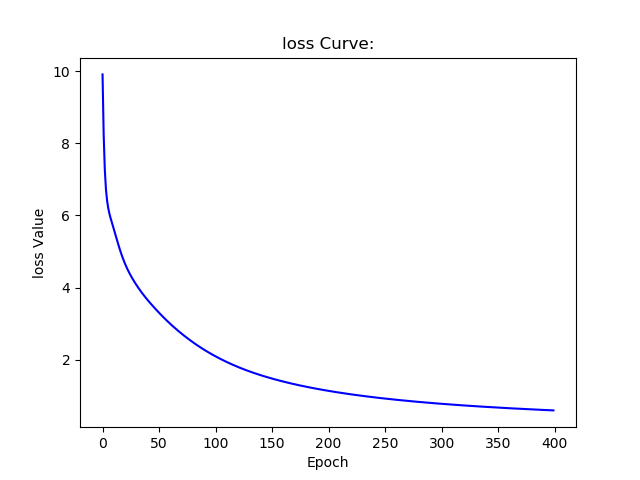
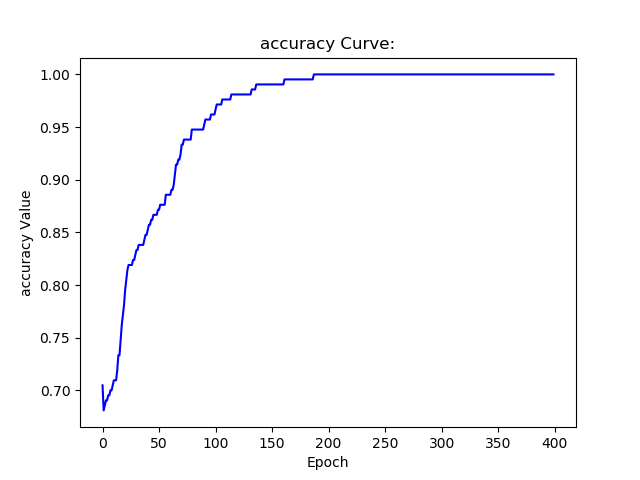

In [ ]:
batch_size = 1               # SGD
batch_size = 8               # mini-batch